3-means clustering


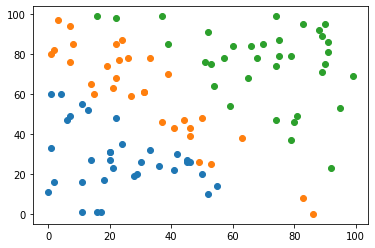

Uniformly distributed clusters


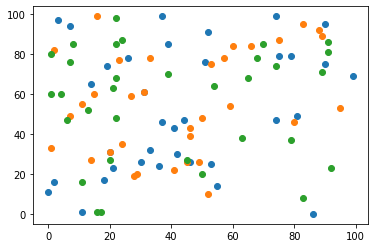

In [127]:
# import random
import numpy as np
import matplotlib.pyplot as plt

#generiamo un set di dati 2-dimensionali
cardinality = 100
data = []
for i in range(cardinality):
    data.append([int(random.random()*100), int(random.random()*100)])
data = np.array(data)

# numero di clusters = 3
k = 3

# selezione di tre centroidi casuali
centroids = np.array(random.sample(list(data), k))

# euristica numero iterazioni per stabilizzazione clustering
max_iterations = 10

# matrice distanze [ indice, cluster ]
distances = np.zeros((len(data), k))

# K-means
for i in range(max_iterations):
    for j in range(k):
        distances[:, j] = np.linalg.norm(data - centroids[j], axis=1)
    labels = np.argmin(distances, axis=1)
    centroids = np.array([np.mean(data[j], axis=0) for j in range(k)])

# plotting k-means
print(str(k)+"-means clustering")
lab = np.unique(labels)
for i in lab:
    plt.scatter(data[labels == i,0], data[labels == i, 1])
plt.show()
    
# creiamo tre set vuoti che conterranno i dati provenienti dai k cluster calcolati
equally_distributed_cluster = [[] for i in range(k)]

# splittiamo il set di dati in k liste per ogni cluster
data_split = [data[labels == j] for j in range(k)]

# per ogni cluster, distrubiamo uniformemente nei k cluster finali
for d in data_split:
    for i in range(len(d)):
        equally_distributed_cluster[i%k].append(d[i])
        
equally_distributed_cluster = np.array(equally_distributed_cluster, dtype=object)
# plotting
print("Uniformly distributed clusters")
for i in range(len(equally_distributed_cluster)):
    e = np.array(equally_distributed_cluster[i])
    plt.scatter(e[:,0] , e[:,1])
plt.show()